In [89]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [90]:
# read in the data
df = pd.read_feather("../preprocessed_data/taxi_add_weather_19.feather").drop('index', axis=1)
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,...,DATE,avg_wind_speed,Rainfall,SNOW,Snow_depth,Max_temp,Min_temp,Thunder,WEEKDAY,weekend
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,1.0,151,239,7.0,1.65,9.95,...,2019-01-01,0.00,0.06,0.0,0.0,58,39,0.0,1,False
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,1.0,239,246,14.0,1.00,16.30,...,2019-01-01,0.00,0.06,0.0,0.0,58,39,0.0,1,False
2,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.30,1.0,163,229,6.5,1.25,9.05,...,2019-01-01,0.00,0.06,0.0,0.0,58,39,0.0,1,False
3,2019-01-01 00:32:01,2019-01-01 00:45:39,1.0,3.70,1.0,229,7,13.5,3.70,18.50,...,2019-01-01,0.00,0.06,0.0,0.0,58,39,0.0,1,False
4,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.10,1.0,141,234,10.0,1.70,13.00,...,2019-01-01,0.00,0.06,0.0,0.0,58,39,0.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19350141,2019-10-31 23:02:44,2019-10-31 23:12:38,1.0,7.27,2.0,56,170,52.0,4.00,65.42,...,2019-10-31,5.14,0.54,0.0,0.0,71,60,0.0,3,False
19350142,2019-10-31 23:39:40,2019-11-01 00:06:07,1.0,16.43,2.0,132,170,52.0,0.00,55.30,...,2019-10-31,5.14,0.54,0.0,0.0,71,60,0.0,3,False
19350143,2019-10-31 23:36:36,2019-11-01 00:10:47,1.0,18.30,2.0,132,148,52.0,11.06,66.36,...,2019-10-31,5.14,0.54,0.0,0.0,71,60,0.0,3,False
19350144,2019-10-31 23:05:41,2019-10-31 23:37:52,1.0,18.34,2.0,132,262,52.0,0.00,61.42,...,2019-10-31,5.14,0.54,0.0,0.0,71,60,0.0,3,False


In [91]:
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["hour"] = df["tpep_pickup_datetime"].dt.hour
df["mean_temp"] = (df["Max_temp"]+df["Min_temp"])/2

In [92]:
df.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime            object
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
fare_amount                     float64
tip_amount                      float64
total_amount                    float64
time_used                       float64
avg_speed                       float64
final_amount                    float64
DATE                     datetime64[ns]
avg_wind_speed                  float64
Rainfall                        float64
SNOW                            float64
Snow_depth                      float64
Max_temp                          int64
Min_temp                          int64
Thunder                         float64
WEEKDAY                           int64
weekend                            bool
hour                              int64
mean_temp                       float64


# Feature selection

In [93]:
abs(df.corr()["tip_amount"])

KeyboardInterrupt: 

In [ ]:
X = df[['trip_distance',"fare_amount","total_amount","time_used","avg_speed","avg_wind_speed","SNOW","mean_temp","WEEKDAY","hour"]]

In [57]:
X

,trip_distance,fare_amount,total_amount,time_used,avg_speed,avg_wind_speed,SNOW,mean_temp,WEEKDAY,hour
0,1.50,7.0,9.95,6.666667,13.500000,0.00,0.0,48.5,1,0
1,2.60,14.0,16.30,19.200000,8.125000,0.00,0.0,48.5,1,0
2,1.30,6.5,9.05,7.150000,10.909091,0.00,0.0,48.5,1,0
3,3.70,13.5,18.50,13.633333,16.283619,0.00,0.0,48.5,1,0
4,2.10,10.0,13.00,12.000000,10.500000,0.00,0.0,48.5,1,0
...,...,...,...,...,...,...,...,...,...,...
19350141,7.27,52.0,65.42,9.900000,44.060606,5.14,0.0,65.5,3,23
19350142,16.43,52.0,55.30,26.450000,37.270321,5.14,0.0,65.5,3,23
19350143,18.30,52.0,66.36,34.183333,32.120917,5.14,0.0,65.5,3,23
19350144,18.34,52.0,61.42,32.183333,34.191611,5.14,0.0,65.5,3,23


In [58]:
Y = df[["tip_amount"]]
Y

,tip_amount
0,1.65
1,1.00
2,1.25
3,3.70
4,1.70
...,...
19350141,4.00
19350142,0.00
19350143,11.06
19350144,0.00


## Normalization

In [59]:
x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

# split the data into training and testing

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 66)

# linear regression



In [61]:
linearg = LinearRegression()
linearg.fit(x_train,y_train)
y_result = linearg.predict(x_test)
print(x_train.size)
print(y_train.size)
print(x_test.size)
print(y_result.size)
print(y_test.size)

154801160
15480116
38700300
3870030
3870030


In [62]:
print(linearg.coef_)

[[ -9.36779768 -27.98086762  96.53751839   4.67113593   2.44445298
   -0.52347987  -0.22519602  -1.18489358   0.16650358  -0.24122374]]


In [63]:
print(linearg.intercept_)

[0.10267624]


In [64]:
# score the model
r2_score(y_test,y_result)

0.7846005675601825

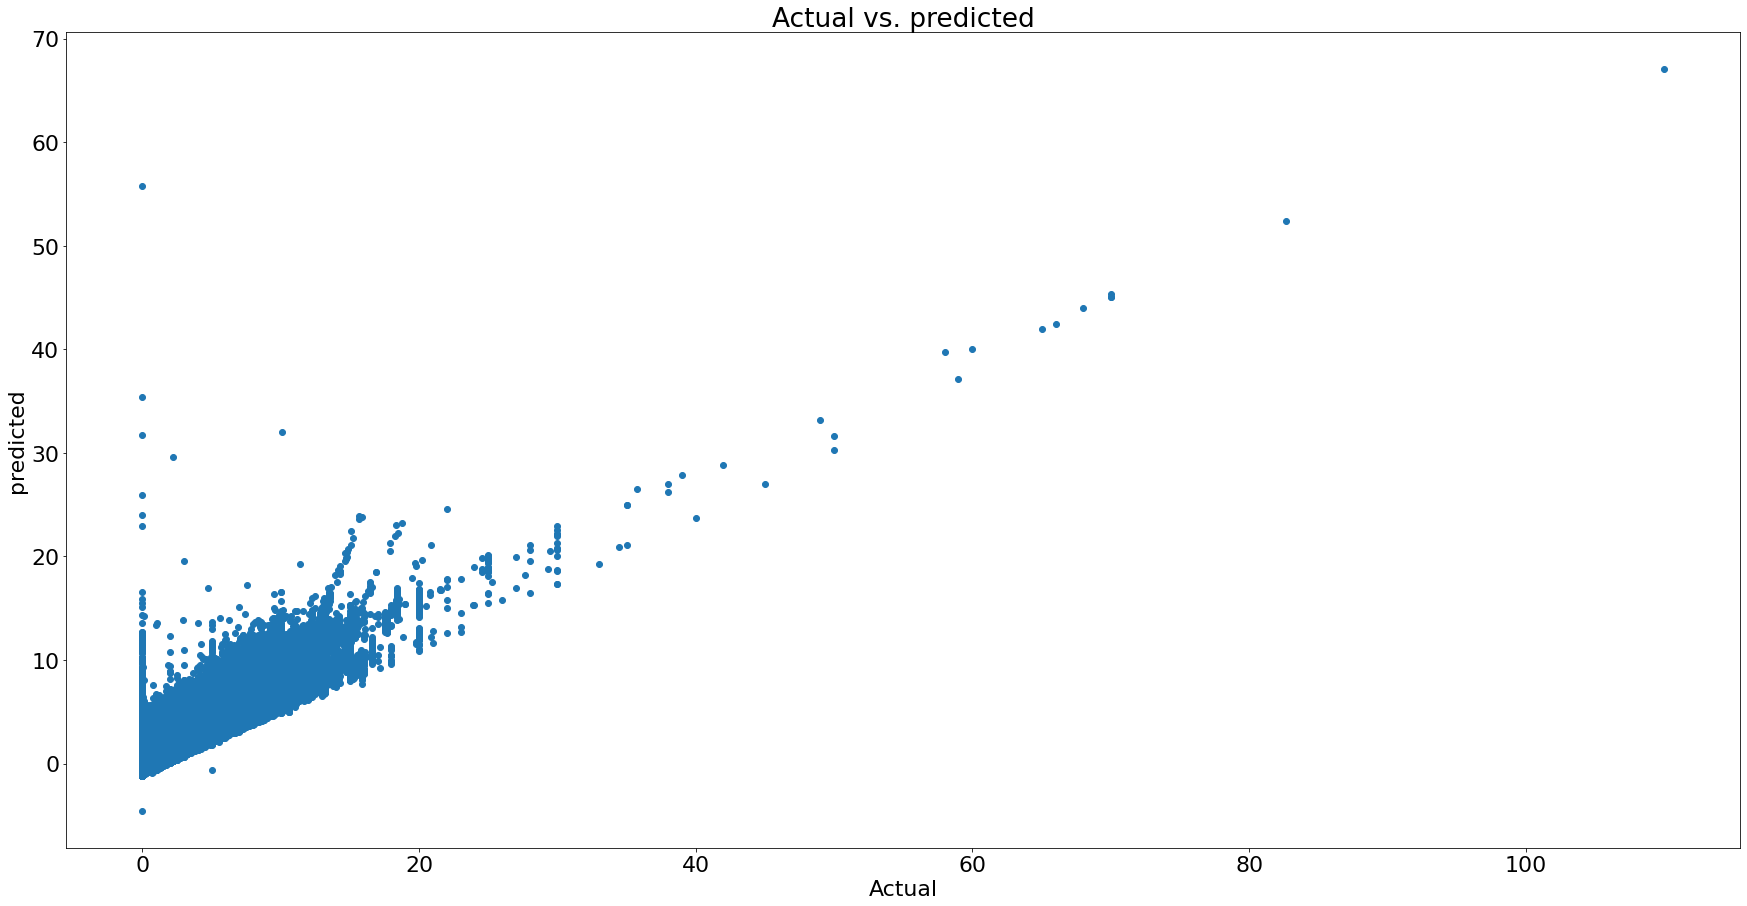

In [65]:
plt.figure(figsize = (30,15))
plt.rcParams.update({'font.size': 22})
plt.scatter(y_test,y_result)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title("Actual vs. predicted")
plt.show()

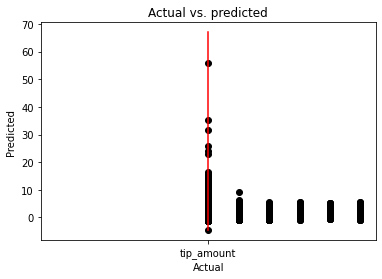

In [66]:
%matplotlib inline

plt.scatter(y_test,y_result,color = "black")

x0 = min(y_test)
x1 = max(y_test)
y0 = min(y_result)
y1 = max(y_result)
plt.plot([x0,x1],[y0,y1],color="red")

plt.xlabel("Actual")
plt.ylabel("Predicted ")
plt.title("Actual vs. predicted")
plt.show()

## evaluate with future data

In [113]:
trip = pd.read_csv("../raw_data/yellow/yellow_tripdata_2019-12.csv")
trip


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.20,1.0,N,142,116,2.0,14.50,3.00,0.5,0.0,0.00,0.3,18.30,2.5
1,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.00,1.0,N,145,145,2.0,2.50,0.50,0.5,0.0,0.00,0.3,3.80,0.0
2,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.00,1.0,N,145,145,2.0,2.50,0.50,0.5,0.0,0.00,0.3,3.80,0.0
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.40,1.0,N,138,25,1.0,28.50,0.50,0.5,10.0,0.00,0.3,39.80,0.0
4,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.60,1.0,N,161,237,2.0,9.00,3.00,0.5,0.0,0.00,0.3,12.80,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896312,NaN,2019-12-31 00:07:00,2019-12-31 00:46:00,NaN,12.78,NaN,NaN,230,72,NaN,32.32,2.75,0.5,0.0,6.12,0.3,41.99,0.0
6896313,NaN,2019-12-31 00:20:00,2019-12-31 00:47:00,NaN,18.52,NaN,NaN,219,32,NaN,51.63,2.75,0.5,0.0,6.12,0.3,61.30,0.0
6896314,NaN,2019-12-31 00:50:00,2019-12-31 01:21:00,NaN,13.13,NaN,NaN,161,76,NaN,38.02,2.75,0.5,0.0,6.12,0.3,47.69,0.0
6896315,NaN,2019-12-31 00:38:19,2019-12-31 01:19:37,NaN,14.51,NaN,NaN,230,21,NaN,41.86,2.75,0.0,0.0,6.12,0.3,51.03,0.0


In [114]:
weather = pd.read_csv("../raw_data/december.csv")

In [115]:
weather

,DATE,AWND,SNOW,TMAX,TMIN
0,1/12/2019,9.84,0.0,39,30
1,2/12/2019,8.50,1.3,37,31
2,3/12/2019,7.16,0.3,36,30
3,4/12/2019,5.37,0.0,39,32
4,5/12/2019,9.40,0.0,42,36
5,6/12/2019,7.38,0.0,50,34
6,7/12/2019,6.93,0.0,38,30
7,8/12/2019,2.68,0.0,46,28
8,9/12/2019,4.47,0.0,55,42
9,10/12/2019,6.93,0.0,58,39


In [116]:
dict = {"AWND":"avg_wind_speed",
       "TMAX":"Max_temp",
       "TMIN":"Min_temp",}
weather.rename(columns = dict,inplace = True)

In [117]:
weather

,DATE,avg_wind_speed,SNOW,Max_temp,Min_temp
0,1/12/2019,9.84,0.0,39,30
1,2/12/2019,8.50,1.3,37,31
2,3/12/2019,7.16,0.3,36,30
3,4/12/2019,5.37,0.0,39,32
4,5/12/2019,9.40,0.0,42,36
5,6/12/2019,7.38,0.0,50,34
6,7/12/2019,6.93,0.0,38,30
7,8/12/2019,2.68,0.0,46,28
8,9/12/2019,4.47,0.0,55,42
9,10/12/2019,6.93,0.0,58,39


In [118]:
cleaned_data = trip

In [119]:
#convert the pickup and dropoff date and time to  datetime64[ns]
cleaned_data["tpep_dropoff_datetime"] = pd.to_datetime(cleaned_data["tpep_dropoff_datetime"])
cleaned_data["tpep_pickup_datetime"] = pd.to_datetime(cleaned_data["tpep_pickup_datetime"])
#add columns time_used and avg_speed
cleaned_data["time_used"] = (cleaned_data["tpep_dropoff_datetime"]-cleaned_data["tpep_pickup_datetime"]).dt.seconds/60
cleaned_data["avg_speed"] = cleaned_data["trip_distance"]/cleaned_data["time_used"]*60

In [120]:
## Keep at least one passenger and no more than five
cleaned_data = cleaned_data[(cleaned_data['passenger_count']>0)&(cleaned_data["passenger_count"]<=5)]

##make sure the distance of trip is at least 0.1mile
cleaned_data = cleaned_data[cleaned_data["trip_distance"]>=0.1]

# only use the payment is 1.credit card \2.Cash\5.unknown
cleaned_data = cleaned_data[(cleaned_data["payment_type"]!=3)&(cleaned_data["payment_type"]!=4)&(cleaned_data["payment_type"]!=6)]

#Make sure the fare_amount larger than entry fee 2.5
cleaned_data = cleaned_data[(cleaned_data["fare_amount"]>=2.5)]

#Make sure the total_amount larger than entry fee 2.5
cleaned_data = cleaned_data[(cleaned_data["total_amount"]>=2.5)]

#there only 0 or 0.5 or 1 for extra
cleaned_data = cleaned_data[(cleaned_data["extra"]== 0 )|(cleaned_data["extra"]== 0.5 )|(cleaned_data["extra"]== 1)]

## Make sure all the trip is happened within2019
cleaned_data = cleaned_data[(cleaned_data["tpep_pickup_datetime"]<="2019-12-31 23:59:59") & (cleaned_data["tpep_dropoff_datetime"]<="2019-12-31 23:59:59")]
cleaned_data = cleaned_data[(cleaned_data["tpep_pickup_datetime"]>="2019-01-01 00:00:00") & (cleaned_data["tpep_dropoff_datetime"]>="2019-01-01 00:00:00")]

#make sure the average speed is lower than 100 and larger than 1
cleaned_data = cleaned_data[(cleaned_data["avg_speed"]<=100) & (cleaned_data["avg_speed"]>=1)]

#make sure the time used is more than 2 minute and less than  3 hours
cleaned_data = cleaned_data[(cleaned_data["time_used"]>=2)& (cleaned_data["time_used"]<180)]



In [121]:
cleaned_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,time_used,avg_speed
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.40,1.0,N,138,25,1.0,28.5,0.5,0.5,10.00,0.00,0.3,39.80,0.0,21.266667,26.520376
11,2.0,2019-11-30 23:54:45,2019-12-01 00:09:57,1.0,2.12,1.0,N,234,230,2.0,12.0,0.5,0.5,0.00,0.00,0.3,15.80,2.5,15.200000,8.368421
12,2.0,2019-12-01 00:39:43,2019-12-01 00:52:06,1.0,1.15,1.0,N,186,48,2.0,9.0,0.5,0.5,0.00,0.00,0.3,12.80,2.5,12.383333,5.572005
13,2.0,2019-12-01 00:43:02,2019-12-01 01:11:18,1.0,13.07,1.0,N,41,51,2.0,38.5,0.5,0.5,0.00,0.00,0.3,39.80,0.0,28.266667,27.742925
17,2.0,2019-12-01 00:37:17,2019-12-01 01:07:39,5.0,19.98,2.0,N,132,238,1.0,52.0,0.0,0.5,14.73,6.12,0.3,73.65,0.0,30.366667,39.477497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6845293,2.0,2019-12-31 23:20:52,2019-12-31 23:25:16,1.0,0.72,1.0,N,238,151,2.0,5.5,0.5,0.5,0.00,0.00,0.3,9.30,2.5,4.400000,9.818182
6845294,2.0,2019-12-31 23:09:42,2019-12-31 23:22:39,1.0,1.47,1.0,N,68,246,2.0,10.0,0.5,0.5,0.00,0.00,0.3,13.80,2.5,12.950000,6.810811
6845295,2.0,2019-12-31 23:46:57,2019-12-31 23:50:54,1.0,0.97,1.0,N,233,170,1.0,5.0,0.5,0.5,1.76,0.00,0.3,10.56,2.5,3.950000,14.734177
6845296,2.0,2019-12-31 23:22:03,2019-12-31 23:29:06,1.0,3.30,1.0,N,262,224,1.0,11.0,0.5,0.5,2.96,0.00,0.3,17.76,2.5,7.050000,28.085106


In [122]:
cleaned_data = cleaned_data[(cleaned_data["RatecodeID"]==2)|(cleaned_data["RatecodeID"]==1)]

In [123]:
cleaned_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,time_used,avg_speed
3,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.40,1.0,N,138,25,1.0,28.5,0.5,0.5,10.00,0.00,0.3,39.80,0.0,21.266667,26.520376
11,2.0,2019-11-30 23:54:45,2019-12-01 00:09:57,1.0,2.12,1.0,N,234,230,2.0,12.0,0.5,0.5,0.00,0.00,0.3,15.80,2.5,15.200000,8.368421
12,2.0,2019-12-01 00:39:43,2019-12-01 00:52:06,1.0,1.15,1.0,N,186,48,2.0,9.0,0.5,0.5,0.00,0.00,0.3,12.80,2.5,12.383333,5.572005
13,2.0,2019-12-01 00:43:02,2019-12-01 01:11:18,1.0,13.07,1.0,N,41,51,2.0,38.5,0.5,0.5,0.00,0.00,0.3,39.80,0.0,28.266667,27.742925
17,2.0,2019-12-01 00:37:17,2019-12-01 01:07:39,5.0,19.98,2.0,N,132,238,1.0,52.0,0.0,0.5,14.73,6.12,0.3,73.65,0.0,30.366667,39.477497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6845293,2.0,2019-12-31 23:20:52,2019-12-31 23:25:16,1.0,0.72,1.0,N,238,151,2.0,5.5,0.5,0.5,0.00,0.00,0.3,9.30,2.5,4.400000,9.818182
6845294,2.0,2019-12-31 23:09:42,2019-12-31 23:22:39,1.0,1.47,1.0,N,68,246,2.0,10.0,0.5,0.5,0.00,0.00,0.3,13.80,2.5,12.950000,6.810811
6845295,2.0,2019-12-31 23:46:57,2019-12-31 23:50:54,1.0,0.97,1.0,N,233,170,1.0,5.0,0.5,0.5,1.76,0.00,0.3,10.56,2.5,3.950000,14.734177
6845296,2.0,2019-12-31 23:22:03,2019-12-31 23:29:06,1.0,3.30,1.0,N,262,224,1.0,11.0,0.5,0.5,2.96,0.00,0.3,17.76,2.5,7.050000,28.085106


In [124]:
#create a column to show only the date

remove = ["payment_type","extra","mta_tax","improvement_surcharge","tolls_amount","congestion_surcharge"]
cleaned_data = cleaned_data.drop(columns=remove)
trip = cleaned_data
trip['DATE'] = pd.to_datetime(trip['tpep_pickup_datetime']).dt.date
trip["DATE"] = (trip["DATE"]).apply(str)
trip["DATE"] = pd.to_datetime(trip["DATE"])



In [125]:
weather.dtypes

DATE               object
avg_wind_speed    float64
SNOW              float64
Max_temp            int64
Min_temp            int64
dtype: object

In [126]:
#convert the type of date
weather["DATE"] = pd.to_datetime(weather["DATE"])

#fill the missing data with 0
weather = weather.fillna(0)

In [127]:
result = pd.merge(trip, weather, on='DATE')

In [128]:
result

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,time_used,avg_speed,DATE,avg_wind_speed,SNOW,Max_temp,Min_temp
0,2.0,2019-12-24 03:26:51,2019-12-24 03:47:19,1.0,5.30,1.0,N,211,145,19.0,4.00,32.42,20.466667,15.537459,2019-12-24,5.82,0.0,47,36
1,2.0,2019-12-24 04:58:33,2019-12-24 05:17:50,1.0,1.82,1.0,N,236,140,12.5,0.00,15.80,19.283333,5.662921,2019-12-24,5.82,0.0,47,36
2,2.0,2019-12-24 05:21:13,2019-12-24 05:51:22,1.0,2.06,1.0,N,140,170,18.5,4.36,26.16,30.150000,4.099502,2019-12-24,5.82,0.0,47,36
3,2.0,2019-12-24 10:39:57,2019-12-24 10:45:16,1.0,0.73,1.0,N,237,237,5.5,1.96,11.76,5.316667,8.238245,2019-12-24,5.82,0.0,47,36
4,2.0,2019-12-24 10:48:45,2019-12-24 10:51:10,2.0,0.36,1.0,N,237,236,3.5,1.56,9.36,2.416667,8.937931,2019-12-24,5.82,0.0,47,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674643,2.0,2019-12-30 23:59:23,2019-12-31 00:03:48,2.0,1.01,1.0,N,68,158,5.5,1.00,10.30,4.416667,13.720755,2019-12-30,12.75,0.0,41,37
2674644,2.0,2019-12-30 12:56:15,2019-12-30 13:17:23,1.0,6.29,1.0,N,186,157,21.0,0.00,30.92,21.133333,17.858044,2019-12-30,12.75,0.0,41,37
2674645,2.0,2019-12-30 20:55:06,2019-12-30 20:58:36,1.0,0.71,1.0,N,137,170,4.5,1.66,9.96,3.500000,12.171429,2019-12-30,12.75,0.0,41,37
2674646,2.0,2019-12-30 21:05:47,2019-12-30 21:16:28,1.0,3.75,1.0,N,107,263,12.0,3.16,18.96,10.683333,21.060842,2019-12-30,12.75,0.0,41,37


In [129]:
result["tpep_pickup_datetime"] = pd.to_datetime(result["tpep_pickup_datetime"])
result["hour"] = result["tpep_pickup_datetime"].dt.hour
result["mean_temp"] = (result["Max_temp"]+result["Min_temp"])/2

result['WEEKDAY'] = pd.to_datetime(result['DATE']).dt.dayofweek  # monday = 0, sunday = 6
result['weekend'] = 0          # Initialize the column with default value of 0
result["weekend"]= result['WEEKDAY'].isin([5, 6])


In [130]:
result

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,...,avg_speed,DATE,avg_wind_speed,SNOW,Max_temp,Min_temp,hour,mean_temp,WEEKDAY,weekend
0,2.0,2019-12-24 03:26:51,2019-12-24 03:47:19,1.0,5.30,1.0,N,211,145,19.0,...,15.537459,2019-12-24,5.82,0.0,47,36,3,41.5,1,False
1,2.0,2019-12-24 04:58:33,2019-12-24 05:17:50,1.0,1.82,1.0,N,236,140,12.5,...,5.662921,2019-12-24,5.82,0.0,47,36,4,41.5,1,False
2,2.0,2019-12-24 05:21:13,2019-12-24 05:51:22,1.0,2.06,1.0,N,140,170,18.5,...,4.099502,2019-12-24,5.82,0.0,47,36,5,41.5,1,False
3,2.0,2019-12-24 10:39:57,2019-12-24 10:45:16,1.0,0.73,1.0,N,237,237,5.5,...,8.238245,2019-12-24,5.82,0.0,47,36,10,41.5,1,False
4,2.0,2019-12-24 10:48:45,2019-12-24 10:51:10,2.0,0.36,1.0,N,237,236,3.5,...,8.937931,2019-12-24,5.82,0.0,47,36,10,41.5,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674643,2.0,2019-12-30 23:59:23,2019-12-31 00:03:48,2.0,1.01,1.0,N,68,158,5.5,...,13.720755,2019-12-30,12.75,0.0,41,37,23,39.0,0,False
2674644,2.0,2019-12-30 12:56:15,2019-12-30 13:17:23,1.0,6.29,1.0,N,186,157,21.0,...,17.858044,2019-12-30,12.75,0.0,41,37,12,39.0,0,False
2674645,2.0,2019-12-30 20:55:06,2019-12-30 20:58:36,1.0,0.71,1.0,N,137,170,4.5,...,12.171429,2019-12-30,12.75,0.0,41,37,20,39.0,0,False
2674646,2.0,2019-12-30 21:05:47,2019-12-30 21:16:28,1.0,3.75,1.0,N,107,263,12.0,...,21.060842,2019-12-30,12.75,0.0,41,37,21,39.0,0,False


In [131]:
new_X =  result[['trip_distance',"fare_amount","total_amount","time_used","avg_speed","avg_wind_speed","SNOW","mean_temp","WEEKDAY","hour"]]

In [132]:
new_X

,trip_distance,fare_amount,total_amount,time_used,avg_speed,avg_wind_speed,SNOW,mean_temp,WEEKDAY,hour
0,5.30,19.0,32.42,20.466667,15.537459,5.82,0.0,41.5,1,3
1,1.82,12.5,15.80,19.283333,5.662921,5.82,0.0,41.5,1,4
2,2.06,18.5,26.16,30.150000,4.099502,5.82,0.0,41.5,1,5
3,0.73,5.5,11.76,5.316667,8.238245,5.82,0.0,41.5,1,10
4,0.36,3.5,9.36,2.416667,8.937931,5.82,0.0,41.5,1,10
...,...,...,...,...,...,...,...,...,...,...
2674643,1.01,5.5,10.30,4.416667,13.720755,12.75,0.0,39.0,0,23
2674644,6.29,21.0,30.92,21.133333,17.858044,12.75,0.0,39.0,0,12
2674645,0.71,4.5,9.96,3.500000,12.171429,12.75,0.0,39.0,0,20
2674646,3.75,12.0,18.96,10.683333,21.060842,12.75,0.0,39.0,0,21


In [133]:
new_Y = result[["tip_amount"]]

In [134]:
new_Y

,tip_amount
0,4.00
1,0.00
2,4.36
3,1.96
4,1.56
...,...
2674643,1.00
2674644,0.00
2674645,1.66
2674646,3.16


In [135]:
new_x = new_X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
new_x_scaled = min_max_scaler.fit_transform(new_x)
new_X = pd.DataFrame(new_x_scaled)
new_result = linearg.predict(new_X)
r2_score(new_Y,new_result)

-0.2660026237798101

In [136]:
new_X

,0,1,2,3,4,5,6,7,8,9
0,0.066242,0.011228,0.019816,0.104008,0.149305,0.295732,0.0,0.700000,0.166667,0.130435
1,0.021911,0.006805,0.008506,0.097343,0.047890,0.295732,0.0,0.700000,0.166667,0.173913
2,0.024968,0.010888,0.015556,0.158547,0.031833,0.295732,0.0,0.700000,0.166667,0.217391
3,0.008025,0.002042,0.005757,0.018680,0.074339,0.295732,0.0,0.700000,0.166667,0.434783
4,0.003312,0.000681,0.004124,0.002347,0.081525,0.295732,0.0,0.700000,0.166667,0.434783
...,...,...,...,...,...,...,...,...,...,...
2674643,0.011592,0.002042,0.004764,0.013611,0.130647,1.000000,0.0,0.616667,0.000000,1.000000
2674644,0.078854,0.012589,0.018796,0.107763,0.173138,1.000000,0.0,0.616667,0.000000,0.521739
2674645,0.007771,0.001361,0.004532,0.008448,0.114735,1.000000,0.0,0.616667,0.000000,0.869565
2674646,0.046497,0.006465,0.010657,0.048906,0.206032,1.000000,0.0,0.616667,0.000000,0.913043


In [137]:
X

,0,1,2,3,4,5,6,7,8,9
0,0.015755,0.090909,0.039820,0.026254,0.126656,0.00000,0.0,0.496855,0.166667,0.0
1,0.028134,0.232323,0.077844,0.096765,0.072194,0.00000,0.0,0.496855,0.166667,0.0
2,0.013504,0.080808,0.034431,0.028973,0.100404,0.00000,0.0,0.496855,0.166667,0.0
3,0.040513,0.222222,0.091018,0.065448,0.154861,0.00000,0.0,0.496855,0.166667,0.0
4,0.022507,0.151515,0.058084,0.056259,0.096259,0.00000,0.0,0.496855,0.166667,0.0
...,...,...,...,...,...,...,...,...,...,...
19350141,0.080689,1.000000,0.371976,0.044444,0.436312,0.44196,0.0,0.710692,0.500000,1.0
19350142,0.183772,1.000000,0.311377,0.137553,0.367509,0.44196,0.0,0.710692,0.500000,1.0
19350143,0.204817,1.000000,0.377605,0.181060,0.315333,0.44196,0.0,0.710692,0.500000,1.0
19350144,0.205267,1.000000,0.348024,0.169808,0.336314,0.44196,0.0,0.710692,0.500000,1.0
